In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the time module.
import time

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
              
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        # traceback.print_exc()
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# city_data.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | nenjiang
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | theunissen
Processing Record 8 of Set 1 | nantucket
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | sidney
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | hunza
City not found. Skipping...
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | luzhou
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | new 

Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | kutum
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | morden
Processing Record 44 of Set 4 | asfi
Processing Record 45 of Set 4 | richards bay
Processing Record 46 of Set 4 | kaeo
Processing Record 47 of Set 4 | toliary
City not found. Skipping...
Processing Record 48 of Set 4 | coxim
Processing Record 49 of Set 4 | duobao
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | mergui
City not found. Skipping...
Processing Record 2 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 5 | carnot
Processing Record 5 of Set 5 | geraldton
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | warmbad

Processing Record 23 of Set 8 | severnoye
Processing Record 24 of Set 8 | tadine
Processing Record 25 of Set 8 | kemijarvi
Processing Record 26 of Set 8 | niitsu
Processing Record 27 of Set 8 | stokmarknes
Processing Record 28 of Set 8 | axim
Processing Record 29 of Set 8 | rudarpur
Processing Record 30 of Set 8 | tiznit
Processing Record 31 of Set 8 | batagay-alyta
Processing Record 32 of Set 8 | atasu
Processing Record 33 of Set 8 | ellensburg
Processing Record 34 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | bud
Processing Record 37 of Set 8 | zaoyang
Processing Record 38 of Set 8 | pechenga
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | gorodovikovsk
Processing Record 41 of Set 8 | la ronge
Processing Record 42 of Set 8 | tamandare
Processing Record 43 of Set 8 | aleksandrovka
Processing Record 44 of Set 8 | okhtyrka
Proce

Processing Record 15 of Set 12 | konya
Processing Record 16 of Set 12 | road town
Processing Record 17 of Set 12 | leh
Processing Record 18 of Set 12 | kafanchan
Processing Record 19 of Set 12 | antanifotsy
Processing Record 20 of Set 12 | cotonou
Processing Record 21 of Set 12 | trairi
Processing Record 22 of Set 12 | lat yao
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | whitefish
Processing Record 25 of Set 12 | macenta
Processing Record 26 of Set 12 | barra dos coqueiros
Processing Record 27 of Set 12 | hit
Processing Record 28 of Set 12 | san quintin
Processing Record 29 of Set 12 | pacific grove
Processing Record 30 of Set 12 | dandong
Processing Record 31 of Set 12 | sovetsk
Processing Record 32 of Set 12 | khani
Processing Record 33 of Set 12 | mastic beach
Processing Record 34 of Set 12 | acaponeta
Processing Record 35 of Set 12 | ranipur
Processing Record 36 of Set 12 | ishigaki
Processing Record 37 of Set 12 | quelimane
Processing Record 38

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,55.00,47,28,5.01,PT,2021-01-14 21:34:31
1,Vaini,-21.2000,-175.2000,84.20,79,20,8.05,TO,2021-01-14 21:37:33
2,Nenjiang,49.1833,125.2167,-20.07,85,0,3.96,CN,2021-01-14 21:41:16
3,Albany,42.6001,-73.9662,37.00,69,100,1.21,US,2021-01-14 21:34:10
4,Theunissen,-28.4110,26.7011,68.61,78,18,5.59,ZA,2021-01-14 21:41:16
5,Nantucket,41.2835,-70.0995,44.60,81,90,5.75,US,2021-01-14 21:37:05
6,Rikitea,-23.1203,-134.9692,77.58,72,77,10.13,PF,2021-01-14 21:37:39
7,Nikolskoye,59.7035,30.7861,5.00,78,75,2.24,RU,2021-01-14 21:41:17
8,Sidney,-33.8679,151.2073,73.00,83,75,6.91,AU,2021-01-14 21:36:48
9,Busselton,-33.6500,115.3333,60.01,76,37,5.01,AU,2021-01-14 21:41:17


In [7]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2021-01-14 21:34:31,32.6667,-17.1000,55.00,47,28,5.01
1,Vaini,TO,2021-01-14 21:37:33,-21.2000,-175.2000,84.20,79,20,8.05
2,Nenjiang,CN,2021-01-14 21:41:16,49.1833,125.2167,-20.07,85,0,3.96
3,Albany,US,2021-01-14 21:34:10,42.6001,-73.9662,37.00,69,100,1.21
4,Theunissen,ZA,2021-01-14 21:41:16,-28.4110,26.7011,68.61,78,18,5.59
5,Nantucket,US,2021-01-14 21:37:05,41.2835,-70.0995,44.60,81,90,5.75
6,Rikitea,PF,2021-01-14 21:37:39,-23.1203,-134.9692,77.58,72,77,10.13
7,Nikolskoye,RU,2021-01-14 21:41:17,59.7035,30.7861,5.00,78,75,2.24
8,Sidney,AU,2021-01-14 21:36:48,-33.8679,151.2073,73.00,83,75,6.91
9,Busselton,AU,2021-01-14 21:41:17,-33.6500,115.3333,60.01,76,37,5.01


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/14/21'

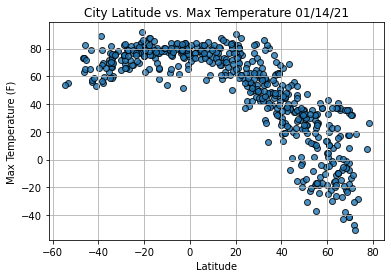

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

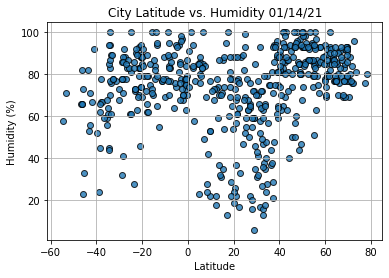

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

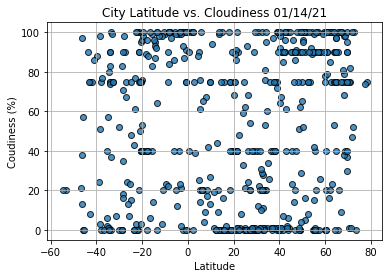

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Coudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

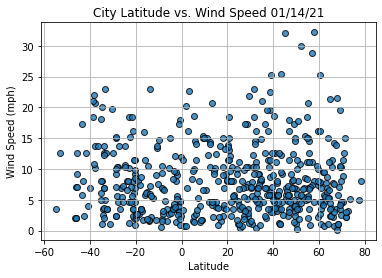

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()